In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
situational_file_path = "C:/Users/SAPTARSHI/Downloads/situational factors.xlsx" 
df_situational = pd.read_excel(situational_file_path)


In [3]:
# Define independent variables (X) and target variable (y)
X_situational = df_situational.drop(columns=["Have you ever crossed the street during a red light?"])
y_situational = df_situational["Have you ever crossed the street during a red light?"]

In [4]:
# Standardize continuous variables
scaler = StandardScaler()
X_situational_scaled = scaler.fit_transform(X_situational)

In [5]:
# Split dataset into training and testing sets
X_train_sit, X_test_sit, y_train_sit, y_test_sit = train_test_split(
    X_situational_scaled, y_situational, test_size=0.2, random_state=42
)

In [6]:
# Train logistic regression model
log_reg_sit = LogisticRegression()
log_reg_sit.fit(X_train_sit, y_train_sit)

LogisticRegression()

In [7]:
# Get feature importance (coefficients)
feature_importance = log_reg_sit.coef_[0]

In [8]:
# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({"Feature": X_situational.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [9]:
# Print feature importance
print("Feature Importance Ranking:")
print(importance_df)

Feature Importance Ranking:
                                             Feature  Importance
1  What are the main reasons that make you more l...    0.816611
3  When do you believe red light violations are m...    0.371871
2  Do you believe that adding countdown timers to...    0.345419
4  Which type of vehicle is more likely to violat...    0.109336
5  Which type of intersections do you believe is ...   -0.274105
0  In which areas do you think red light violatio...   -1.014881


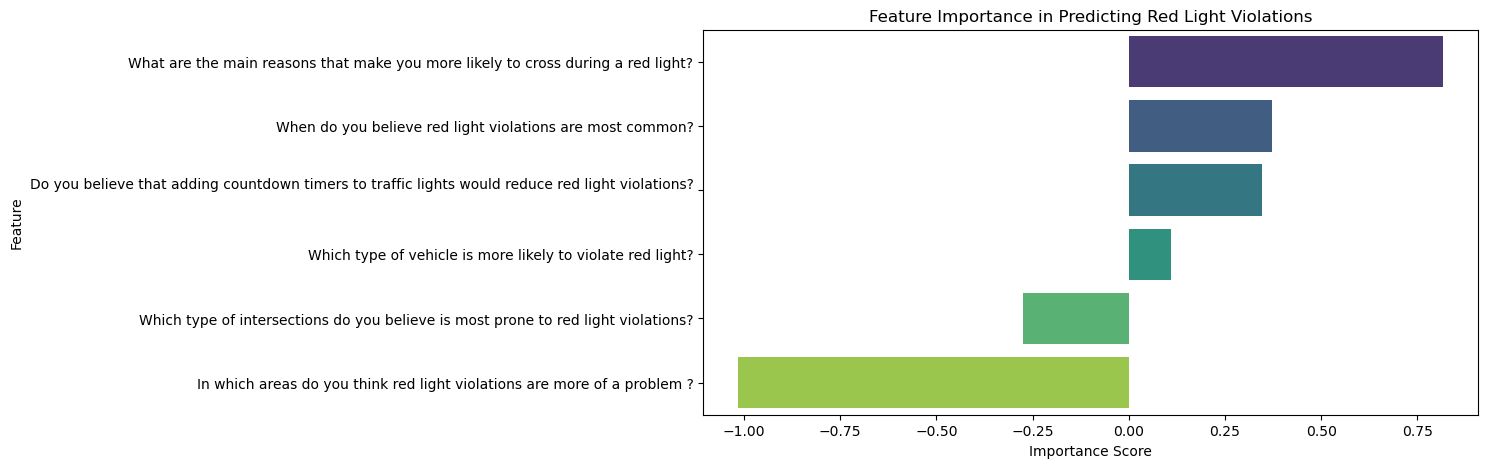

In [12]:
# Visualization of feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Red Light Violations")
plt.show()

In [10]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients_sit = log_reg_sit.coef_[0]
odds_ratios_sit = np.exp(coefficients_sit)

In [11]:
# Create a DataFrame to display feature importance and odds ratios
importance_df_sit = pd.DataFrame(
    {"Feature": X_situational.columns, "Coefficient": coefficients_sit, "Odds_Ratio": odds_ratios_sit}
).sort_values(by="Odds_Ratio", ascending=False)

In [13]:
# Print feature importance and odds ratios
print("Feature Importance and Odds Ratios:")
print(importance_df_sit)

Feature Importance and Odds Ratios:
                                             Feature  Coefficient  Odds_Ratio
1  What are the main reasons that make you more l...     0.816611    2.262819
3  When do you believe red light violations are m...     0.371871    1.450447
2  Do you believe that adding countdown timers to...     0.345419    1.412581
4  Which type of vehicle is more likely to violat...     0.109336    1.115537
5  Which type of intersections do you believe is ...    -0.274105    0.760252
0  In which areas do you think red light violatio...    -1.014881    0.362446


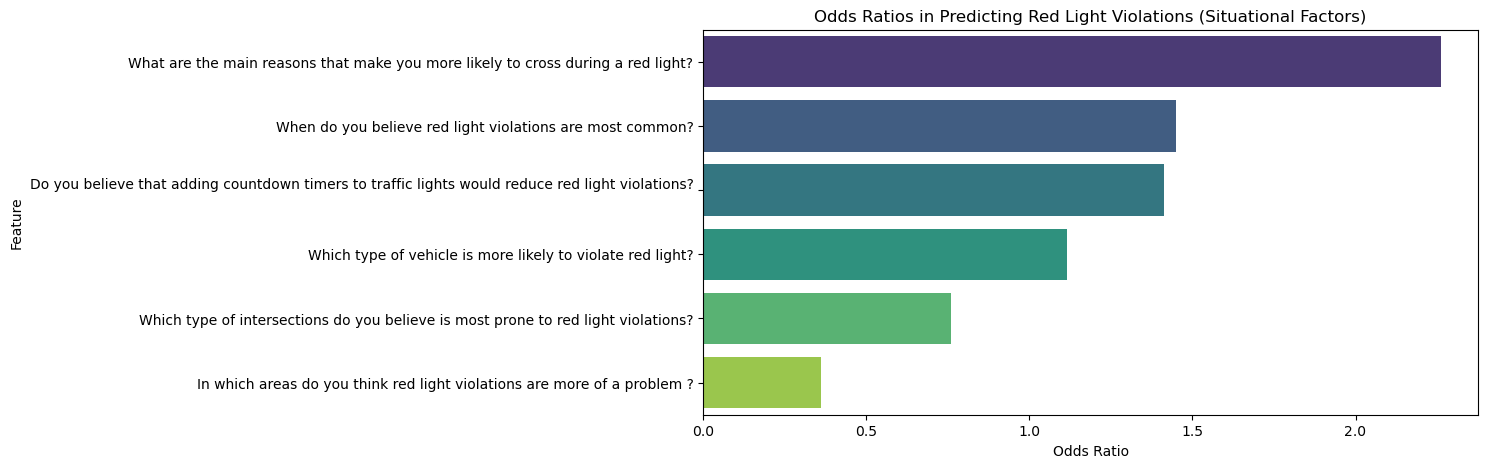

In [14]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_sit["Odds_Ratio"], y=importance_df_sit["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Situational Factors)")
plt.show()
